In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#loading the data
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


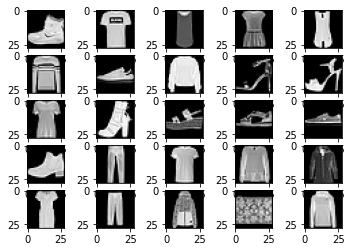

In [ ]:
#visualizing the dataset
for i in range(25):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
#normalizing the images
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = Sequential([
    
    #flattening the images
    Flatten(input_shape=(28,28)),
    
    #adding first hidden layer
    Dense(256, activation='relu'),
    
    #adding second hidden layer
    # Dense(128,activation='relu'),
    
    #adding third hidden layer
    # Dense(64,activation='relu'),
    
    #adding output layer
    Dense(10, activation='softmax')
])

In [ ]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

#fitting the model
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4877 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3274 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.8872
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.8936


In [ ]:
#evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3590 - accuracy: 0.8666


[0.3590086102485657, 0.866599977016449]

In [ ]:
#use this command to install Keras tuner
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.2 MB/s 


In [ ]:
#installing the required libraries
from tensorflow import keras
from keras_tuner import RandomSearch

# Hyperparameter to be tuned
* Number of hidden layers
* Number of neurons in each hidden layer
* Learning rate
* Activation Function

In [ ]:
# Defining the function to build an ANN model where the hyperparameters will be 
# the Number of neurons in the hidden layer and Learning rate.

def build_model(hp):          #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=(28,28)))
    
    #providing range for number of neurons in a hidden layer
    model.add(Dense(units = hp.Int('num_of_neurons',min_value=32,
                                   max_value=512,step=32),
                    activation='relu'))
    
    #output layer
    model.add(Dense(10,activation='softmax'))
    
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

**In the above code, we have defined the function by the name build_model(hp) where hp stands for hyperparameter. While adding the hidden layer we use hp.Int( ) function which takes the Integer value and tests on the range specified in it for tuning. We have provided the range for neurons from 32 to 512 with a step size of 32 so the model will test on neurons 32, 64,96,128…,512**

**Then we have added the output layer. While compiling the model Adam optimizer is used with different values of learning rate which is the next hyperparameter for tuning. hp.Choice( ) function is used which will test on any one of the three values provided for the learning rate.**

https://keras.io/guides/keras_tuner/getting_started/

In [ ]:
#feeding the model and parameters to Random Search
tuner = RandomSearch(build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner1',
    project_name ='Clothing')

**The code above uses the Random Search Hyperparameter Optimizer. The following variables are provided to the Random Search. The first is model i.e build_model, next objective is val_accuracy that means the objective of the model is to get a good validation accuracy. Next, the value of trails and execution per trail provided which is 5 and 3 respectively in our case meaning 15 (5*3) iterations will be done by the model to find the best parameters. Directory and project name are provided to save the values of every trial.**

In [ ]:
#this tells us how many hyperparameter we are tuning
#in our case it's 2 = neurons, learning rate
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
%%time
#fitting the tuner on train dataset
tuner.search(X_train,y_train,epochs = 5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 01m 41s]
val_accuracy: 0.8595666488011678

Best val_accuracy So Far: 0.8595666488011678
Total elapsed time: 00h 11m 10s
INFO:tensorflow:Oracle triggered exit


**The above code will run 5 trails with 3 executions each and will print the trail details which provide the highest validation accuracy. In the below figure, we can see the best validation accuracy achieved by the model.**

In [ ]:
tuner.results_summary()

Results summary
Results in tuner1/Clothing
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_neurons: 224
learning_rate: 0.0001
Score: 0.8595666488011678
Trial summary
Hyperparameters:
num_of_neurons: 96
learning_rate: 0.01
Score: 0.850000003973643
Trial summary
Hyperparameters:
num_of_neurons: 160
learning_rate: 0.01
Score: 0.848466674486796
Trial summary
Hyperparameters:
num_of_neurons: 288
learning_rate: 0.01
Score: 0.8474000096321106
Trial summary
Hyperparameters:
num_of_neurons: 480
learning_rate: 0.01
Score: 0.8447666565577189


**Let’s tune some more parameters in the next code. Here we are also providing the range of the number of layers to be used in the model which is between 2 to 20**

In [ ]:
def build_model(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=(28,28)))
    
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,20)):         
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=512,step=32),
                                    activation='relu'))
    model.add(Dense(10,activation='softmax'))    #output layer
    
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
#feeding the model and parameters to Random Search
tuner=RandomSearch(build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Clothing')

In [ ]:
#tells us how many hyperparameters we are tuning
#in our case it's 3 =layers,neurons,learning rate
tuner.search_space_summary()
#fitting the tuner
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Trial 5 Complete [00h 10m 09s]
val_accuracy: 0.6190333366394043

Best val_accuracy So Far: 0.8828000028928121
Total elapsed time: 01h 06m 12s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/Clothing
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_layers: 5
num_of_neurons0: 320
num_of_neurons1: 256
learning_rate: 0.001
num_of_neurons2: 224
num_of_neurons3: 224
num_of_neurons4: 320
num_of_neurons5: 384
num_of_neurons6: 224
num_of_neurons7: 384
num_of_neurons8: 448
num_of_neurons9: 160
num_of_neurons10: 192
num_of_neurons11: 256
num_of_neurons12: 224
num_of_neurons13: 256
num_of_neurons14: 160
num_of_neurons15: 32
num_of_neurons16: 256
num_of_neurons17: 352
num_of_neurons18: 160
Score: 0.8828000028928121
Trial summary
Hyperparameters:
num_of_layers: 19
num_of_neurons0: 320
num_of_neurons1: 384
learning_rate: 0.0001
num_of_neurons2: 32
num_of_neurons3: 32
num_of_neurons4: 32
num_of_neurons5: 32
num_of_neurons6: 32
num_of_neurons7: 32
num_of_neurons8: 32
num_of_neurons9: 32
num_of_neurons10: 32
num_of_neurons11: 32
num_of_neurons12: 32
num_of_neurons13: 32
num_of_neurons14: 32
num_o